In [1]:
!pip install 'tensorflow == 2.3.0'

ERROR: Invalid requirement: "'tensorflow"


In [2]:
import os
import numpy as np
import shutil
import time

In [3]:
%pwd

'C:\\Users\\USER\\jb_n1'

In [4]:
rootdir= 'G:/데이터/포도/Training' #path of the original folder
classes = ['포도정상', '포도노균병']

In [5]:
#!rm -rf './train'  # 리눅스명령어? rm -파일 혹은 디렉토리 삭제
#!rm -rf './valid'

In [6]:
for i in classes:
    os.makedirs('G:/데이터/포도/Train/' + i)
    os.makedirs('G:/데이터/포도/valid/' + i)
    source = rootdir + '/' + i
    allFileNames = os.listdir(source)
    print(allFileNames)
    np.random.shuffle(allFileNames)
    test_ratio = 0.25
    train_FileNames, test_FileNames = np.split(np.array(allFileNames),[int(len(allFileNames)*(1 - test_ratio))])
    train_FileNames = [source+'/'+ name for name in train_FileNames.tolist()]
    test_FileNames = [source+'/'+ name for name in test_FileNames.tolist()]
    for name in train_FileNames:
        shutil.copy(name,'G:/데이터/포도/Train/' + i)
    for name in test_FileNames:
        shutil.copy(name,'G:/데이터/포도/valid/' + i)

['V006_77_0_00_12_03_25_0_c03_20201020_0000_S01_1.jpg', 'V006_77_0_00_12_03_25_0_c03_20201020_0001_S01_1.jpg', 'V006_77_0_00_12_03_25_0_c03_20201020_0002_S01_1.jpg', 'V006_77_0_00_12_03_25_0_c03_20201020_0003_S01_1.jpg', 'V006_77_0_00_12_03_25_0_c03_20201020_0004_S01_1.jpg', 'V006_77_0_00_12_03_25_0_c03_20201020_0005_S01_1.jpg', 'V006_77_0_00_12_03_25_0_c03_20201020_0006_S01_1.jpg', 'V006_77_0_00_12_03_25_0_c03_20201020_0007_S01_1.jpg', 'V006_77_0_00_12_03_25_0_c03_20201020_0008_S01_1.jpg', 'V006_77_0_00_12_03_25_0_c03_20201020_0009_S01_1.jpg', 'V006_77_0_00_12_03_25_0_c03_20201020_0010_S01_1.jpg', 'V006_77_0_00_12_03_25_0_c03_20201020_0011_S01_1.jpg', 'V006_77_0_00_12_03_25_0_c03_20201020_0012_S01_1.jpg', 'V006_77_0_00_12_03_25_0_c03_20201020_0013_S01_1.jpg', 'V006_77_0_00_12_03_25_0_c03_20201020_0014_S01_1.jpg', 'V006_77_0_00_12_03_25_0_c03_20201020_0015_S01_1.jpg', 'V006_77_0_00_12_03_25_0_c03_20201020_0016_S01_1.jpg', 'V006_77_0_00_12_03_25_0_c03_20201020_0017_S01_1.jpg', 'V006_77_

['V006_77_1_20_12_03_13_1_0502b_20200916_1.jpg', 'V006_77_1_20_12_03_13_1_0502b_20200916_2.jpg', 'V006_77_1_20_12_03_13_1_0502b_20200916_26.jpg', 'V006_77_1_20_12_03_13_1_0502b_20201005_24.jpeg', 'V006_77_1_20_12_03_13_1_0502b_20201005_3.jpeg', 'V006_77_1_20_12_03_13_1_0502b_20201005_7.jpeg', 'V006_77_1_20_12_03_13_1_0502b_20201009_1.JPEG', 'V006_77_1_20_12_03_13_1_0502b_20201009_10.JPEG', 'V006_77_1_20_12_03_13_1_0502b_20201009_11.JPEG', 'V006_77_1_20_12_03_13_1_0502b_20201009_12.JPEG', 'V006_77_1_20_12_03_13_1_0502b_20201009_13.JPEG', 'V006_77_1_20_12_03_13_1_0502b_20201009_15.JPEG', 'V006_77_1_20_12_03_13_1_0502b_20201009_16.JPEG', 'V006_77_1_20_12_03_13_1_0502b_20201009_17.JPEG', 'V006_77_1_20_12_03_13_1_0502b_20201009_18.JPEG', 'V006_77_1_20_12_03_13_1_0502b_20201009_19.JPEG', 'V006_77_1_20_12_03_13_1_0502b_20201009_2.JPEG', 'V006_77_1_20_12_03_13_1_0502b_20201009_20.JPEG', 'V006_77_1_20_12_03_13_1_0502b_20201009_21.JPEG', 'V006_77_1_20_12_03_13_1_0502b_20201009_22.JPEG', 'V006_77

In [7]:
# Directory with our training Tomato_healthy pictures
train_healthy_dir = os.path.join('G:/데이터/포도/train/포도정상/')

# Directory with our training Tomato_Late_blight pictures
train_unhealthy_dir = os.path.join('G:/데이터/포도/valid/포도노균병/')

# Directory with our validation Tomato_healthy pictures
valid_healthy_dir = os.path.join('G:/데이터/포도/train/포도정상/')

# Directory with our validation Tomato_Late_blight pictures
valid_unhealthy_dir = os.path.join('G:/데이터/포도/valid/포도노균병/')

In [8]:
train_healthy_names = os.listdir(train_healthy_dir)
print(train_healthy_names[:10])

train_unhealthy_names = os.listdir(train_unhealthy_dir)
print(train_unhealthy_names[:10])

validation_healthy_names = os.listdir(valid_healthy_dir)
print(validation_healthy_names[:10])

validation_unhealthy_names = os.listdir(valid_unhealthy_dir)
print(validation_unhealthy_names[:10])

['V006_77_0_00_12_03_25_0_c03_20201020_0001_S01_1.jpg', 'V006_77_0_00_12_03_25_0_c03_20201020_0004_S01_1.jpg', 'V006_77_0_00_12_03_25_0_c03_20201020_0005_S01_1.jpg', 'V006_77_0_00_12_03_25_0_c03_20201020_0006_S01_1.jpg', 'V006_77_0_00_12_03_25_0_c03_20201020_0007_S01_1.jpg', 'V006_77_0_00_12_03_25_0_c03_20201020_0008_S01_1.jpg', 'V006_77_0_00_12_03_25_0_c03_20201020_0009_S01_1.jpg', 'V006_77_0_00_12_03_25_0_c03_20201020_0010_S01_1.jpg', 'V006_77_0_00_12_03_25_0_c03_20201020_0011_S01_1.jpg', 'V006_77_0_00_12_03_25_0_c03_20201020_0012_S01_1.jpg']
['V006_77_1_20_12_03_13_1_0502b_20201005_24.jpeg', 'V006_77_1_20_12_03_13_1_0502b_20201009_11.JPEG', 'V006_77_1_20_12_03_13_1_0502b_20201009_13.JPEG', 'V006_77_1_20_12_03_13_1_0502b_20201009_19.JPEG', 'V006_77_1_20_12_03_13_1_0502b_20201009_21.JPEG', 'V006_77_1_20_12_03_13_1_0502b_20201009_24.JPEG', 'V006_77_1_20_12_03_13_1_0502b_20201009_35.JPEG', 'V006_77_1_20_12_03_13_1_0502b_20201015_15.jpg', 'V006_77_1_20_12_03_13_1_0502b_20201015_18.jpg', 

In [9]:
print('total training 포도정상 images:', len(os.listdir(train_healthy_dir)))
print('total training 포도노균병 images:', len(os.listdir(train_unhealthy_dir)))
print('total validation 포도정상 images:', len(os.listdir(valid_healthy_dir)))
print('total validation 포도노균병 images:', len(os.listdir(valid_unhealthy_dir)))

total training 포도정상 images: 7146
total training 포도노균병 images: 55
total validation 포도정상 images: 7146
total validation 포도노균병 images: 55


In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

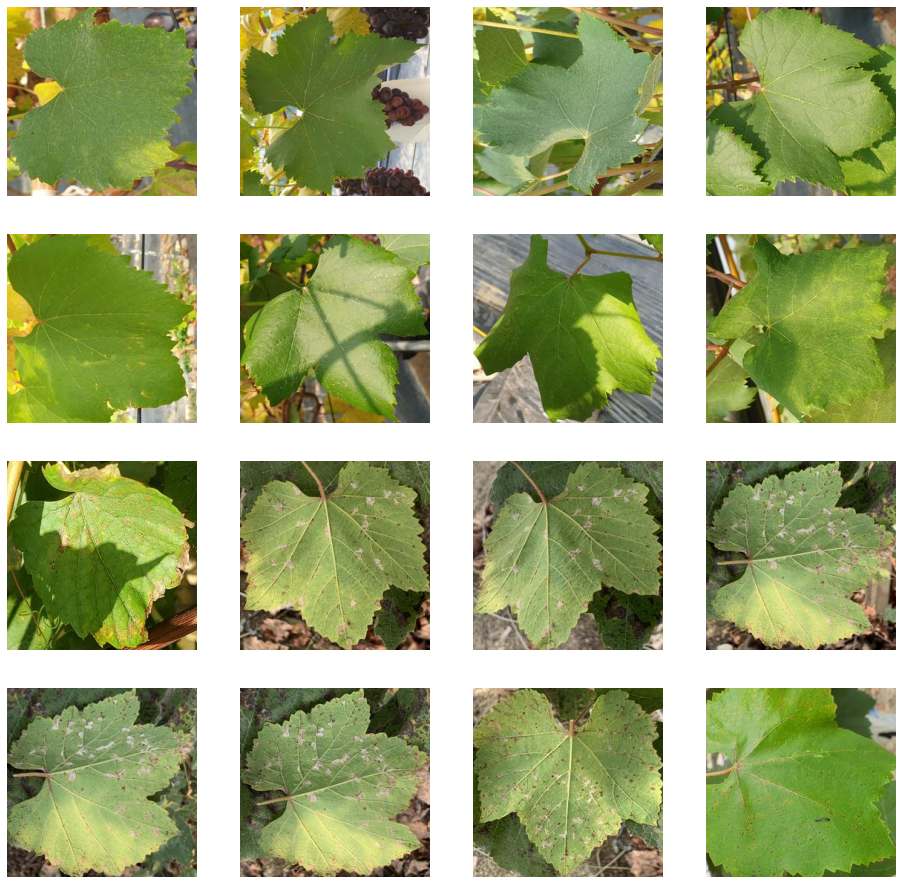

In [11]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_healthy_pic = [os.path.join(train_healthy_dir, fname) 
                for fname in train_healthy_names[pic_index-8:pic_index]]
next_unhealthy_pic = [os.path.join(train_unhealthy_dir, fname) 
                for fname in train_unhealthy_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_healthy_pic + next_unhealthy_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 120 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'G:/데이터/포도/train/',  # This is the source directory for training images
        classes = ['포도정상', '포도노균병'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=120,
        # Use binary labels
        class_mode='binary')

# Flow validation images in batches of 19 using valid_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        'G:/데이터/포도/valid/',  # This is the source directory for training images
        classes = ['포도정상', '포도노균병'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=19,
        # Use binary labels
        class_mode='binary',
        shuffle=False)

Found 7311 images belonging to 2 classes.
Found 2437 images belonging to 2 classes.


In [13]:
#MobileNetV2
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [14]:
model = Sequential()
model.add(MobileNetV2(include_top = False, weights="imagenet", input_shape=(200, 200, 3)))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(Dense(1, activation = 'sigmoid'))
model.layers[0].trainable = False

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [16]:
from tensorflow.keras.optimizers import RMSprop

# model.compile(loss='binary_crossentropy',
#               optimizer=RMSprop(lr=0.001),
#               metrics=['accuracy', tf.keras.metrics.AUC()])

from tensorflow.keras import optimizers


model.compile(optimizer=RMSprop(learning_rate=0.01), loss = 'binary_crossentropy', metrics = 'accuracy')

In [17]:
st=time.perf_counter()
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=7,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)
nd=time.perf_counter()

Epoch 1/7
8/8 [==============================] - 15s 2s/step - loss: 0.3643 - accuracy: 0.9281 - val_loss: 6.5158e-05 - val_accuracy: 1.0000
Epoch 2/7
8/8 [==============================] - 13s 2s/step - loss: 0.1416 - accuracy: 0.9781 - val_loss: 0.0699 - val_accuracy: 1.0000
Epoch 3/7
8/8 [==============================] - 13s 2s/step - loss: 0.2485 - accuracy: 0.9615 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 4/7
8/8 [==============================] - 13s 2s/step - loss: 0.0323 - accuracy: 0.9906 - val_loss: 0.0113 - val_accuracy: 1.0000
Epoch 5/7
8/8 [==============================] - 13s 2s/step - loss: 0.1729 - accuracy: 0.9667 - val_loss: 1.6292e-04 - val_accuracy: 1.0000
Epoch 6/7
8/8 [==============================] - 13s 2s/step - loss: 0.0750 - accuracy: 0.9842 - val_loss: 1.2671 - val_accuracy: 0.2961
Epoch 7/7
8/8 [==============================] - 13s 2s/step - loss: 0.2297 - accuracy: 0.9583 - val_loss: 0.0660 - val_accuracy: 0.9934


In [18]:
print("train_time: ",nd-st)

train_time:  91.8939705


In [19]:
model.evaluate(validation_generator)

129/129 [==============================] - 28s 219ms/step - loss: 0.0577 - accuracy: 0.9783


[0.05768198519945145, 0.9782519340515137]

In [20]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds = model.predict(validation_generator,
                      verbose=1)

129/129 [==============================] - 28s 216ms/step


In [21]:
fpr, tpr, _ = roc_curve(validation_generator.classes, preds)

In [22]:
roc_auc = auc(fpr, tpr)

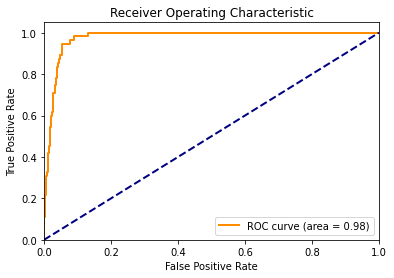

In [23]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [24]:
model.save('포도노균병mnet2.h5')
# %matplotlib inline
# import matplotlib.pyplot as plt
# import numpy as np
# from google.colab import files
# from keras.preprocessing import image

# uploaded = files.upload()

# for fn in uploaded.keys():
 
#   # predicting images
#   path = '/content/' + fn
#   img = image.load_img(path, target_size=(200, 200))
#   x = image.img_to_array(img)
#   plt.imshow(x/255.)
#   x = np.expand_dims(x, axis=0)
#   images = np.vstack([x])
#   classes = model.predict(images, batch_size=10)
#   print(classes[0])
#   if classes[0]<0.5:
#     print(fn + " is 참외정상")
#   else:
#     print(fn + " is 참외흰가루병")


In [25]:
#SqueezeNet
bnmomemtum=0.9
def fire(x, squeeze, expand):
    y  = tf.keras.layers.Conv2D(filters=squeeze, kernel_size=1, activation='relu', padding='same')(x)
    y = tf.keras.layers.BatchNormalization(momentum=bnmomemtum)(y)
    y1 = tf.keras.layers.Conv2D(filters=expand//2, kernel_size=1, activation='relu', padding='same')(y)
    y1 = tf.keras.layers.BatchNormalization(momentum=bnmomemtum)(y1)
    y3 = tf.keras.layers.Conv2D(filters=expand//2, kernel_size=3, activation='relu', padding='same')(y)
    y3 = tf.keras.layers.BatchNormalization(momentum=bnmomemtum)(y3)
    return tf.keras.layers.concatenate([y1, y3])

def fire_module(squeeze, expand):
    return lambda x: fire(x, squeeze, expand)
x = tf.keras.layers.Input(shape=[200,200, 3]) # input is 200x200 pixels RGB
y = tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', use_bias=True, activation='relu')(x)
y = tf.keras.layers.BatchNormalization(momentum=bnmomemtum)(y)
y = fire_module(24, 48)(y)
y = tf.keras.layers.MaxPooling2D(pool_size=2)(y)
y = fire_module(48, 96)(y)
y = tf.keras.layers.MaxPooling2D(pool_size=2)(y)
y = fire_module(64, 128)(y)
y = tf.keras.layers.MaxPooling2D(pool_size=2)(y)
y = fire_module(48, 96)(y)
y = tf.keras.layers.MaxPooling2D(pool_size=2)(y)
y = fire_module(24, 48)(y)
y = tf.keras.layers.GlobalAveragePooling2D()(y)
y = tf.keras.layers.Dense(1, activation='sigmoid')(y)

model2 = tf.keras.Model(x, y)

model2.compile(
optimizer='adam',
loss= 'binary_crossentropy',
metrics=['accuracy'])
model2.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 200, 200, 32  896         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 200, 200, 32  128        ['conv2d[0][0]']                 
 alization)                     )                                                             

                                                                                                  
 conv2d_11 (Conv2D)             (None, 25, 25, 48)   2352        ['batch_normalization_10[0][0]'] 
                                                                                                  
 conv2d_12 (Conv2D)             (None, 25, 25, 48)   20784       ['batch_normalization_10[0][0]'] 
                                                                                                  
 batch_normalization_11 (BatchN  (None, 25, 25, 48)  192         ['conv2d_11[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_12 (BatchN  (None, 25, 25, 48)  192         ['conv2d_12[0][0]']              
 ormalization)                                                                                    
          

In [26]:
st=time.perf_counter()
history = model2.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=7,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)
nd=time.perf_counter()

Epoch 1/7
8/8 [==============================] - 104s 13s/step - loss: 0.6825 - accuracy: 0.5708 - val_loss: 0.7505 - val_accuracy: 0.0000e+00
Epoch 2/7
8/8 [==============================] - 101s 13s/step - loss: 0.6435 - accuracy: 0.7708 - val_loss: 0.7309 - val_accuracy: 0.1053
Epoch 3/7
8/8 [==============================] - 102s 13s/step - loss: 0.6115 - accuracy: 0.8406 - val_loss: 0.8682 - val_accuracy: 0.0987
Epoch 4/7
8/8 [==============================] - 101s 13s/step - loss: 0.5751 - accuracy: 0.9396 - val_loss: 0.7180 - val_accuracy: 0.4408
Epoch 5/7
8/8 [==============================] - 101s 13s/step - loss: 0.5399 - accuracy: 0.9385 - val_loss: 0.5340 - val_accuracy: 0.9276
Epoch 6/7
8/8 [==============================] - 103s 13s/step - loss: 0.5056 - accuracy: 0.9365 - val_loss: 0.5821 - val_accuracy: 0.8618
Epoch 7/7
8/8 [==============================] - 102s 13s/step - loss: 0.4647 - accuracy: 0.9748 - val_loss: 0.6039 - val_accuracy: 0.7961


In [27]:
print("train time-squeezenet: ", nd-st)

train time-squeezenet:  714.7832913


In [28]:
model2.evaluate(validation_generator)

129/129 [==============================] - 46s 353ms/step - loss: 0.4553 - accuracy: 0.9606


[0.45527637004852295, 0.9606072902679443]

In [29]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds = model2.predict(validation_generator,
                      verbose=1)

129/129 [==============================] - 46s 353ms/step


In [30]:
fpr2, tpr2, _ = roc_curve(validation_generator.classes, preds)

In [31]:
roc_auc2 = auc(fpr, tpr)

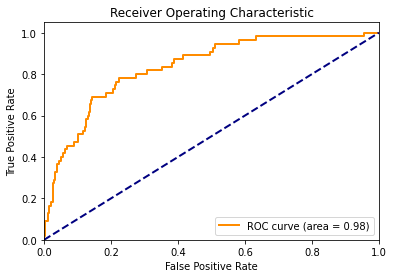

In [32]:
plt.figure()
lw = 2
plt.plot(fpr2, tpr2, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [33]:
model.save('포도노균병snet2.h5')

[참고자료] https://velog.io/@sset2323/03-05.-ROC-%EA%B3%A1%EC%84%A0%EA%B3%BC-AUC